### OCR 

In [97]:
from PIL import Image
import pytesseract
import sys

def recognize_captcha(img_path):
    im = Image.open(img_path).convert('L')
    num = pytesseract.image_to_string(img_path, config='--psm 10')
    return num

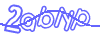

In [98]:
Image.open("2abnp.png")

In [99]:
recognize_captcha("2abnp.png")

'ZafdSiyR'

OCR is no good for any kind of noisy image, predictions are way off the charts

In [45]:
Image.open("test2.jpg")

In [154]:
recognize_captcha_threshold("test2.jpg")

'3558'

In [152]:
Image.open("2A2X.png")

In [155]:
recognize_captcha_threshold("2A2X.png")

'2A2X'

In [162]:
from PIL import Image
import pytesseract
import sys
from skimage.filters import *

def recognize_captcha_threshold(img_path):
    image = cv2.imread(img_path,0)
#     kernel = np.ones((2,2),np.uint8)
#     imgage = cv2.erode(image,kernel,iterations = 1)
#     image = cv2.dilate(image,kernel,iterations = 1)
    imgNew=threshold_local(image, block_size=3, method='gaussian', offset=0, mode='reflect', param=0.2, cval=0)
    num = pytesseract.image_to_string(imgNew, config='--psm 10')
    return num



In [158]:
recognize_captcha_threshold("2abnp.png")


'Bef'

In [165]:
import cv2
from PIL import Image
import os

results=[]
actual =[]

for filename in os.walk("./class1/"):
    for flname in filename[-1]:
        
        img_path = "./class1/"+ flname
        
       
        im = recognize_captcha_threshold(img_path)
        
        results.append(im)
        
        actual.append(flname.replace(".png", ""))
        
# print("actual labels:",actual)


# print("-----------------------------------------------------------------------------------------")


# print("predicted labels:",results)


In [159]:
import pandas as pd
df2 = pd.DataFrame({'actual labels': actual,
                   'predicted':results})

df2[ df2['actual labels'] == df2['predicted']]

,actual labels,predicted
0,2A2X,2A2X
1,2A5R,2A5R
3,2A98,2A98
6,2AEF,2AEF
8,2AQ7,2AQ7
10,2B67,2B67
12,2BK3,2BK3
14,2BLG,2BLG
15,2BN9,2BN9
18,2BVF,2BVF


In [166]:
count = 0
for item in range(len(results)):
    if actual[item].lower()==results[item].lower():
        count=count+1
        
print(count/len(results))

0.49
